In [1]:
import utils

In [2]:
# import torch
# import random
# import torch.nn as nn

# import torch.distributions as D

# import numpy as np
# import cma
# from tqdm.notebook import tqdm
# import pickle

# import matplotlib.pyplot as plt

# import torch.nn.functional as F

# def sample_uniform(batch_size, N_dim, r1, r2):
#     random_matrix = (r1 - r2) * torch.rand([batch_size, N_dim]) + r2
#     return random_matrix

# class MLP(nn.Module):
#     def __init__(self, data_dimensions,name,seed=None):
#         if seed is not None:
#             torch.manual_seed(seed)
#         else:
#             print("Torch seed:%s"%torch.seed())
#         super(MLP, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(data_dimensions, int(data_dimensions)),
#             nn.Tanh(),
# #             nn.Linear(int(data_dimensions*5), int(data_dimensions/5)),
# #             nn.ReLU(),
# #             nn.Linear(int(data_dimensions), int(data_dimensions/5)),
# #             nn.ReLU(),
# #             nn.Linear(int(data_dimensions/5), int(data_dimensions/5)),
# #             nn.ReLU(),
#             nn.Linear(int(data_dimensions), 2)
#         )
#         self.name = name
#         self.train_accuracy = 0
#         self.test_accuracy = 0
#         self.dataset = []

#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = self.layers(x)
#         return x

# class CMA_info():
#     def __init__(self, model_name, num_samples):
#         super(CMA_info, self).__init__()
#         self.model_name = model_name
#         self.num_samples = num_samples
        
#         self.distances = []
#         self.in_dist_advs = []
#         self.advs = []
#         self.starts = []
    
#     def summary(self):
#         print('****************** CMA Summary *******************')
#         print('Trained on %s points:'%self.model_name.split('_')[-1])
#         print('Adversarials: %s/%s'%(len(self.advs), self.num_samples))
#         print('In-distribution: %s/%s'%(len(self.in_dist_advs), len(self.advs)))
        
#         avg_dist = np.mean(self.distances)
#         print('Average L2 distance: %s'%(avg_dist))
#         print('*'*50)

# x1_min = -10
# x1_max = 10

# x2_min = 20
# x2_max = 40

# test_min = -1
# test_max= 1

# def make_dataset(dataset_size):
#     sample_1 = sample_uniform(dataset_size, N_dim, x1_min, x1_max)
#     sample_2 = sample_uniform(dataset_size, N_dim, x2_min, x2_max)
    
#     labels_1 = torch.zeros(len(sample_1))
#     labels_2 = torch.ones(len(sample_2))
    
#     X = torch.vstack([sample_1, sample_2])
#     Y = torch.hstack([labels_1, labels_2])
#     ids = list(range(len(X)))

#     random.shuffle(ids)
#     train_ids = ids[:int(0.8*len(X))]
#     test_ids = ids[int(0.8*len(X)):]

#     # len(X)

#     X_train = X[train_ids]
#     X_test = X[test_ids]

#     Y_train = Y[train_ids]
#     Y_test = Y[test_ids]
#     return X_train, X_test, Y_train, Y_test

# # torch.optim.Adam

# def train_model(N_dim, dataset, name, seed = None):
#     X_train, X_test, Y_train, Y_test = dataset
#     X_train = X_train.cuda()
#     X_test = X_test.cuda()
#     Y_train = Y_train.cuda()
#     Y_test = Y_test.cuda()
    
#     if seed is not None:
#         model = MLP(N_dim, name, seed).cuda()
#     else:
#         model = MLP(N_dim, name).cuda()
#     optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
#     loss_fn = nn.CrossEntropyLoss()
#     model.dataset = dataset
    
#     for epoch in tqdm(range(1000)): 
#         outputs = model(X_train)
#         loss = loss_fn(outputs, Y_train.long())
#         loss.backward()
#         optimizer.step()

#         predictions = torch.argmax(model(X_test), dim=1)
#         accuracy = torch.sum(predictions == Y_test)/len(Y_test)
        
#         train_predictions = torch.argmax(model(X_train), dim=1)
#         train_accuracy = torch.sum(train_predictions == Y_train)/len(Y_train)

#         if epoch == 999:
#             print("Epoch:%s, Train Acc:%s"%(epoch, train_accuracy))
#             print("Epoch:%s, Test Acc:%s"%(epoch, accuracy))
        
#         model.test_accuracy = accuracy
#         model.train_accuracy = train_accuracy
    
#     return model

# def batched_train_model(N_dim, dataset, name, seed = None):
#     X_train, X_test, Y_train, Y_test = dataset
#     if seed is not None:
#         model = MLP(N_dim, name, seed).cuda()
#     else:
#         model = MLP(N_dim, name).cuda()
#     optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
#     loss_fn = nn.CrossEntropyLoss()
#     model.dataset = dataset
    
#     BATCH_SIZE = 64000
    
#     for epoch in tqdm(range(1000)):
#         num_batches = int(X_train.shape[0]/(BATCH_SIZE))
        
#         batch_accuracies = []
#         batch_train_accuracies = []
#         for batch_num in range(num_batches):
#             start_pt = BATCH_SIZE * batch_num
#             end_pt = start_pt + BATCH_SIZE
#             train_X = X_train[start_pt:end_pt]
#             train_Y = Y_train[start_pt:end_pt]
#             test_X = X_test
#             test_Y = Y_test
            
#             train_X = train_X.cuda()
#             train_Y = train_Y.cuda()
#             test_X = test_X.cuda()
#             test_Y = test_Y.cuda()

#             outputs = model(train_X)
#             loss = loss_fn(outputs, train_Y.long())
#             loss.backward()
#             optimizer.step()

#             batch_predictions = torch.argmax(model(test_X), dim=1)
#             batch_accuracy = torch.sum(batch_predictions == test_Y)/len(test_Y)
#             batch_accuracies.append(batch_accuracy.item())
            
#             batch_train_predictions = torch.argmax(model(train_X), dim=1)
#             batch_train_accuracy = torch.sum(batch_train_predictions == train_Y)/len(train_Y)
#             batch_train_accuracies.append(batch_train_accuracy.item())        
        
#         accuracy = np.mean(batch_accuracies)
#         train_accuracy = np.mean(batch_train_accuracies)

        
#         if epoch%100 == 0:
#             print("Epoch:%s, Train Acc:%s"%(epoch, train_accuracy))
#             print("Epoch:%s, Test Acc:%s"%(epoch, accuracy))
        
#         if epoch == 999:
#             print("Epoch:%s, Train Acc:%s"%(epoch, train_accuracy))
#             print("Epoch:%s, Test Acc:%s"%(epoch, accuracy))
        
#         model.test_accuracy = accuracy
#         model.train_accuracy = train_accuracy
    
#     return model

In [13]:
#### Tests for generating and training image models####

# image_test_data = make_dataset(1000, True)
# image_test_model = train_model(N_dim, image_test_data, 'dset_size_%s'%dsize, True)

# CMA failures

In [14]:
# def cma_objective(x_input):
#     torch_x = torch.from_numpy(x_input).unsqueeze(0).float()
#     if 'LeNet' in CURRENT_MODEL.name
#     output = CURRENT_MODEL(torch_x)
#     pred_prob = output[0][CATEGORY_NUM].item()
#     prediction = torch.argmax(output[0]).item()
#     return pred_prob, prediction

In [15]:
# torch.vstack([start_pos[0].unsqueeze(0), start_pos[0].unsqueeze(0), start_pos[0].unsqueeze(0)]).shape

In [18]:
def cma_experiment(attacked_model, num_samples = 50):
    cma_search_output = {}
    global CURRENT_MODEL
    CURRENT_MODEL = attacked_model
    print(CURRENT_MODEL.name)
    cma_output = CMA_info(CURRENT_MODEL.name, num_samples)        
    
    for i in tqdm(range(num_samples)):
        initial_pred = 1
        while initial_pred == 1:
            start_pos = sample_uniform(1, N_dim, test_min, test_max)
            output = CURRENT_MODEL(start_pos)
            initial_pred = torch.argmax(output[0]).item()
        cma_output.starts.append(start_pos)
        start_pos = start_pos[0]
        
        es = cma.CMAEvolutionStrategy(start_pos, 0.00005)
        es.optimize(cma_objective, verb_disp = False, iterations=1500, correct_prediction = CATEGORY_NUM)
        adv_offspring_ids = np.where(np.array(es.predictions) != 0)
        
        if len(adv_offspring_ids[0]) > 0:
            random_adv_offspring_id = random.choice(list(adv_offspring_ids[0]))
            random_adv_offspring = es.prediction_settings[random_adv_offspring_id]
            cma_output.advs.append(random_adv_offspring)        

            max_val = np.max(random_adv_offspring)
            if max_val < x1_max:
                cma_output.in_dist_advs.append(random_adv_offspring)
                distance = np.linalg.norm(start_pos - random_adv_offspring)
                cma_output.distances.append(distance)
    return cma_output

In [16]:
def cma_objective(x_input):
    torch_x = torch.from_numpy(x_input).unsqueeze(0).float()
    output = CURRENT_MODEL(torch_x)
    pred_prob = output[0][CATEGORY_NUM].item()
    prediction = torch.argmax(output[0]).item()
    return pred_prob, prediction

In [17]:
# !nvidia-smi

In [19]:
CATEGORY_NUM = 0
CURRENT_MODEL = None

N_dim = 100

In [20]:
# all_info[-1]

In [21]:
# all_info[0]

### CMA attack accuracy vs Dataset size

In [22]:
all_info = []

In [ ]:
for iteration in range(5):
    print('*'*50)
    print('Iteration %s'%iteration)
    print('*'*50)
    
    trained_models = {}
    attack_output = {}
    for dsize in [10000000]:
        print('Working with with %s'%dsize)
        dset = make_dataset(dsize)
        if dsize > 64000:
            trained_models[dsize] = batched_train_model(N_dim, dset, 'dset_size_%s'%dsize)
        else:
            trained_models[dsize] = train_model(N_dim, dset, 'dset_size_%s'%dsize)
        model_to_attack = trained_models[dsize].cpu()
        attack_output[dsize] = cma_experiment(model_to_attack, 50)
    iter_info = [trained_models, attack_output]
    all_info.append(iter_info)

**************************************************
Iteration 0
**************************************************
Working with with 10000000
Torch seed:249770248007289839


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:0, Train Acc:0.8161094133853912
Epoch:0, Test Acc:0.8162047489881515


In [ ]:
# with open('data_size_experiment_5_repeats.p','wb') as F:
#     pickle.dump(all_info_, F)

In [21]:
with open('data_size_experiment_5_repeats.p','rb') as F:
    all_info = pickle.load(F)

In [ ]:
# all_info_

In [ ]:
# all_info_[0][0]

In [133]:
# for i in range(5):
#     all_info_[i][0][1000000] = all_info[i][0][1000000]
#     all_info_[i][1][1000000] = all_info[i][1][1000000]

### Load already run experiments

In [134]:
# with open('failures_dim_100_basic.p','rb') as F:
#     all_info_ = pickle.load(F)

In [135]:
# attack_per_dset_size = {}
# for key in all_info[0][1].keys():
#     adv_count = len(all_info[0][1][key].advs)
#     start_count = len(all_info[0][1][key].starts)
#     attack_rate = adv_count/start_count*100
#     attack_per_dset_size[key] = attack_rate

# Distances to faiulures

In [22]:
dist_means = []
dist_stds = []

for dset in [10000, 50000, 100000, 500000, 1000000]:
    all_distances = []
    for i in range(5):
        all_distances.extend(all_info[i][1][dset].distances)
    dist_mean = np.mean(all_distances)
    dist_std = np.std(all_distances)
    dist_means.append(dist_mean)
    dist_stds.append(dist_std)

plt.errorbar(range(5), dist_means, dist_stds)
plt.xticks(range(5),[10000, 50000, 100000, 500000, 1000000])
plt.title('Distance to adv sample as a function of dataset size')
plt.xlabel('Dataset Size')
plt.xlabel('Distance')
plt.show()

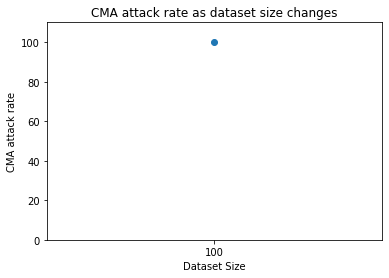

In [81]:
plt.plot(attack_per_dset_size.values(), marker='o')
plt.xticks(list(range(len(attack_per_dset_size.keys()))), labels = attack_per_dset_size.keys())
plt.ylim(0,110)
plt.title('CMA attack rate as dataset size changes')
plt.xlabel('Dataset Size')
plt.ylabel('CMA attack rate')
plt.show()

In [107]:
##### Execute because used extensively below #####
def predict(model, point):
    prepped_point = torch.from_numpy(point).cuda().float().unsqueeze(0)
    prediction = torch.argmax(model(prepped_point)[0]).item()
    return prediction

# Impact of Dimensionality

In [314]:
all_info = []

for iteration in range(10):
    print('*'*50)
    print('Iteration %s'%iteration)
    print('*'*50)
    
    trained_models = {}
    attack_output = {}
    for N_dim in [100]:
        print('Working with with %s dimensions'%N_dim)
        dsize = 50000
        dset = make_dataset(dsize)
        trained_models[N_dim] = train_model(N_dim, dset, 'dset_size_%s'%dsize)
        model_to_attack = trained_models[N_dim].cpu()
        attack_output[N_dim] = cma_experiment(model_to_attack, 10)
        print("Attack: %s/10"%len(attack_output[N_dim].in_dist_advs))
    iter_info = [trained_models, attack_output]
    all_info.append(iter_info)

**************************************************
Iteration 0
**************************************************
Working with with 100 dimensions
Torch seed:1139653631630276727


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9985, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9988, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 1
**************************************************
Working with with 100 dimensions
Torch seed:7862313254884904899


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9989, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9985, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 2
**************************************************
Working with with 100 dimensions
Torch seed:14371003341898146262


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9999, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9999, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 3
**************************************************
Working with with 100 dimensions
Torch seed:3747911055524713789


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9982, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9977, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 4
**************************************************
Working with with 100 dimensions
Torch seed:14398916165240700501


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9995, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9994, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 5
**************************************************
Working with with 100 dimensions
Torch seed:12451373140734796471


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9998, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9997, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 6
**************************************************
Working with with 100 dimensions
Torch seed:4619435499257952251


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9996, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9992, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 7
**************************************************
Working with with 100 dimensions
Torch seed:1594657662621523901


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9978, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9972, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 8
**************************************************
Working with with 100 dimensions
Torch seed:10184540766645026789


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9992, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9990, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10
**************************************************
Iteration 9
**************************************************
Working with with 100 dimensions
Torch seed:12011169846960139171


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9989, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9989, device='cuda:0')
dset_size_50000


  0%|          | 0/10 [00:00<?, ?it/s]

Attack: 10/10


In [147]:
# attack_per_dims_25 = {}
# for dim in [10]:
#     attack_per_dims_25[dim] = []
#     for i in range(25):
#         print("Dims:%s, Attack rate :%s/10"%(dim, len(all_info[i][1][dim].in_dist_advs)))
#         attack_per_dims_25[dim].append(len(all_info[i][1][dim].in_dist_advs)/10)

In [315]:
with open('failures_dim_100_basic.p','wb') as F:
    pickle.dump(all_info,F)

#### Distancess

In [316]:
len(len(all_info[0][1][100].in_dist_advs))

10

In [317]:
failures = all_info[0][1][100].in_dist_advs

In [318]:
starts = all_info[0][1][100].starts

In [320]:
i

tensor([[-0.2603,  0.9359, -0.9204, -0.6824, -0.3301, -0.2534, -0.4780,  0.4041,
          0.0030,  0.1803, -0.0556,  0.4200,  0.6679,  0.9255,  0.6910, -0.9309,
         -0.4121,  0.0405, -0.8949,  0.5817, -0.2825, -0.3546, -0.8105,  0.4707,
          0.5936, -0.4633, -0.7714, -0.4021, -0.1891,  0.0458,  0.6523, -0.1335,
          0.8888, -0.7777, -0.6296, -0.4047, -0.8282,  0.6412,  0.9285, -0.1052,
          0.0273,  0.5738,  0.2976,  0.9805, -0.3625,  0.1735,  0.2875, -0.8304,
          0.0287, -0.1733,  0.7422, -0.7105,  0.7425, -0.1034, -0.0712, -0.1063,
          0.4764, -0.0860, -0.9277, -0.2736, -0.1006,  0.4882, -0.6517, -0.9764,
          0.3405,  0.1498, -0.9092,  0.6068,  0.0408,  0.2023,  0.0195,  0.2258,
          0.0688,  0.3158,  0.9209,  0.6652,  0.5067, -0.8836, -0.0963, -0.1681,
          0.6812, -0.4720, -0.4118, -0.8667, -0.3972,  0.7463,  0.1230,  0.7587,
          0.8202,  0.2865,  0.2952,  0.9327, -0.6918, -0.3382, -0.5707, -0.3721,
         -0.2250,  0.6770, -

In [321]:
all_dists = []
for i in range(len(starts)):
    for j in range(len(starts)):
        if i != j:
            dist = np.linalg.norm(starts[i] - starts[j])
            all_dists.append(dist)

In [322]:
np.mean(all_dists)/len(all_dists)

0.08865706655714246

In [323]:
all_cma_dists = []
for i in range(len(starts)):
    dist = np.linalg.norm(starts[i] - failures[j])
    all_cma_dists.append(dist)

In [324]:
np.mean(all_cma_dists)/len(all_cma_dists)

1.2074063427176827

In [343]:
np.hstack(starts)[0].shape

(1000,)

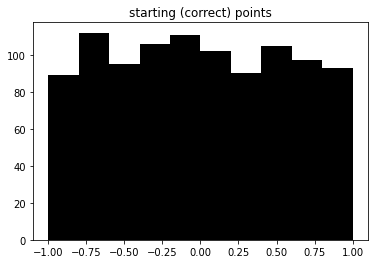

In [345]:
plt.hist(np.hstack(starts)[0], color='black')
plt.title('starting (correct) points')
plt.show()

In [338]:
all_failures = np.hstack(failures)

In [339]:
all_failures.shape

(1000,)

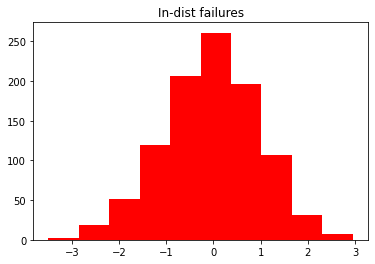

In [347]:
plt.hist(np.hstack(failures), color='red')
plt.title('In-dist failures')
plt.show()

In [330]:
for i in range(10):
    print(np.max(failures[i]))

2.2664233704883725
2.254345139059944
2.438073564544936
2.142996218525954
2.6914953814738314
2.95488977886923
1.8736890528060708
2.1290962593750007
2.4498296094779257
2.531204435817795


In [331]:
for i in range(10):
    print(np.min(failures[i]))

-2.1411045265820863
-2.525721030262321
-2.6324940323577697
-2.478759328402564
-2.8742802674705756
-2.5686374884871594
-2.7906407156008384
-1.3702230078942206
-2.3593934635271925
-3.502021535387346


In [157]:
with open('data_dimension_experiment_10_repeats.p','rb') as F:
    all_info = pickle.load(F)

In [97]:
# len(all_info[0][0][10].dataset)

In [158]:
len(all_info[0][1][10].in_dist_advs)

2

### Checking with data of failed iteration

In [171]:
len(all_info[3][1][10].in_dist_advs)

10

In [162]:
all_info_bad_data = []

N_dim = 10
info_to_track = []
for repeat_iteration in range(5):
    ds = all_info[0][0][10].dataset
#     dataset = make_dataset(10)
    trained_models[N_dim] = train_model(N_dim, ds, 'dset_size_%s_bad_data'%dsize)
    model_to_attack = trained_models[N_dim].cpu()
    attack_output = {}
    attack_output[N_dim] = cma_experiment(model_to_attack, 10)
    print('attack rate:%s/10'%len(attack_output[10].in_dist_advs))
    iter_info = [trained_models, attack_output]
    all_info_bad_data.append(iter_info)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9985, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9983, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:8/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9905, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9896, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:6/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9989, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9992, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:7/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9986, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9984, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:8/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9931, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9932, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9924, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9931, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9969, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9972, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:7/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9983, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9982, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:1/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9982, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9983, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:7/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9995, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9995, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:0/10


In [166]:
for i in range(10):
    print(len(all_info_bad_data[i][1][10].in_dist_advs))

8
6
7
8
10
10
7
1
7
0


In [165]:
with open('data_dimension_experiment_10_repeats_bad_data.p','wb') as F:
    pickle.dump(all_info_bad_data, F)

## Distance between failures

In [313]:
with open('data_dimension_experiment_10_100_1000.p','rb') as F:
    all_info_dimensions = pickle.load(F)

EOFError: Ran out of input

In [167]:
# with open('data_dimension_experiment_10_repeats_bad_data.p','rb') as F:
#     all_info_bad_data = pickle.load(F)

### Checking with data of good iteration

In [172]:
all_info_good_data = []

N_dim = 10
# info_to_track = []
for repeat_iteration in range(10):
    ds = all_info[3][0][10].dataset
#     dataset = make_dataset(10)
    trained_models[N_dim] = train_model(N_dim, ds, 'dset_size_%s_bad_data'%dsize)
    model_to_attack = trained_models[N_dim].cpu()
    attack_output = {}
    attack_output[N_dim] = cma_experiment(model_to_attack, 10)
    print('attack rate:%s/10'%len(attack_output[10].in_dist_advs))
    iter_info = [trained_models, attack_output]
    all_info_good_data.append(iter_info)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9974, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9974, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9957, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9963, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9939, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9937, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:7/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9975, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9975, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:3/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9986, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9988, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:9/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9971, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9970, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:4/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9933, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9938, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:1/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9976, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9969, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9980, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9980, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:2/10


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9962, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9957, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:4/10


In [299]:
# all_info_good_data

In [173]:
for i in range(10):
    print(len(all_info_good_data[i][1][10].in_dist_advs))

10
10
7
3
9
4
1
10
2
4


## So it isn't data. Is it SGD? or initialization?

In [236]:
# model_st = MLP(10, 'yo', seed=2)

In [237]:
# for p in model_st.layers[0].parameters():
#     plt.imshow(p.detach().numpy())
#     plt.show()
#     break
# for p in model_st.layers[2].parameters():
#     plt.imshow(p.detach().numpy())
#     plt.show()
#     break

In [238]:
# model_st = MLP(10, 'yo', seed=3)

In [239]:
# for p in model_st.layers[0].parameters():
#     plt.imshow(p.detach().numpy())
#     plt.show()
#     break
# for p in model_st.layers[2].parameters():
#     plt.imshow(p.detach().numpy())
#     plt.show()
#     break

In [261]:
# 11851462928781797369

In [310]:
all_info_good_data_fixed_initialization = []
trained_models = []
N_dim = 10
for repeat_iteration in range(20):
    ds = all_info[3][0][10].dataset
    trained_models = {}
    trained_models[N_dim] = train_model(N_dim, ds, 'dset_size_%s_bad_data'%dsize)
    
    model_to_attack = trained_models[N_dim].cpu()
    attack_output = {}
    attack_output[N_dim] = cma_experiment(model_to_attack, 10)
    print('attack rate:%s/10'%len(attack_output[10].in_dist_advs))
    iter_info = [trained_models, attack_output]
    all_info_good_data_fixed_initialization.append(iter_info)

Torch seed:4174277284558138264


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9948, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9950, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:9/10
Torch seed:17215775644220476335


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9772, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9760, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:9/10
Torch seed:7496355591039356986


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9952, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9951, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:9/10
Torch seed:534701743729627332


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9984, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9983, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:4/10
Torch seed:14284776827829932665


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9938, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9937, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:6/10
Torch seed:6087812942998053788


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9930, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9932, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:10/10
Torch seed:258536263031431389


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9922, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9909, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:7/10
Torch seed:11613053419389224414


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9971, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9964, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:9/10
Torch seed:11511769989367920629


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9955, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9950, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:6/10
Torch seed:10891682799926915687


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(0.9981, device='cuda:0')
Epoch:999, Test Acc:tensor(0.9979, device='cuda:0')
dset_size_50000_bad_data


  0%|          | 0/10 [00:00<?, ?it/s]

attack rate:4/10
Torch seed:43328430017046853


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

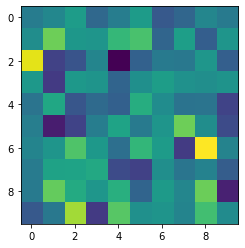

In [297]:
for p in all_info_good_data_fixed_initialization[0][0][10].layers[0].parameters():
    plt.imshow(p.detach().numpy())
    plt.show()
    break

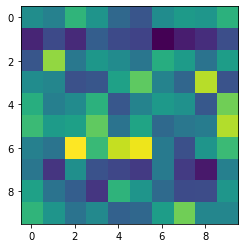

In [298]:
for p in all_info_good_data_fixed_initialization[1][0][10].layers[0].parameters():
    plt.imshow(p.detach().numpy())
    plt.show()
    break

In [268]:
len(all_info_good_data_fixed_initialization)

4

In [278]:
# p.shape

torch.Size([10])

In [287]:
# for p in all_info_good_data_fixed_initialization[3][0][10].layers[0].parameters():
#     plt.imshow(p.detach().cpu())
#     plt.show()
#     break

In [286]:
# for p in all_info_good_data_fixed_initialization[1][0][10].layers[0].parameters():
#     plt.imshow(p.detach().cpu())
#     plt.show()
#     break

In [ ]:
for p in all_info_good_data_fixed_initialization[3][0][10].layers[0].parameters():
    plt.imshow(p.detach().cpu())
    plt.show()
    break

In [249]:
# len(all_info_good_data_fixed_initialization)

In [251]:
# with open('data_dimension_experiment_10_repeats_good_data_fixed_initialization_seed_2.p','wb') as F:
#     pickle.dump(all_info_good_data_fixed_initialization, F)

In [ ]:
# with open('data_dimension_experiment_10_repeats_good_data_fixed_initialization.p','wb') as F:
#     pickle.dump(all_info_good_data, F)

In [ ]:
# with open('data_dimension_experiment_10_repeats.p','rb') as F:
#     all_info = pickle.load(F)

In [39]:
# with open('data_dimension_experiment_10_100_1000.p','wb') as F:
#     pickle.dump(all_info,F)

In [35]:
with open('data_dimension_experiment_10_100_1000.p','rb') as F:
    all_info = pickle.load(F)

In [59]:
attack_per_dims[10] = attack_per_dims_25[10]

In [61]:
# attack_per_dims

In [45]:
attack_per_dims = {}
for dim in [10,100,1000]:
    attack_per_dims[dim] = []
    for i in range(5):
        print("Dims:%s, Attack rate :%s/10"%(dim, len(all_info[i][1][dim].in_dist_advs)))
        attack_per_dims[dim].append(len(all_info[i][1][dim].in_dist_advs)/10)

Dims:10, Attack rate :10/10
Dims:10, Attack rate :1/10
Dims:10, Attack rate :1/10
Dims:10, Attack rate :10/10
Dims:10, Attack rate :7/10
Dims:100, Attack rate :10/10
Dims:100, Attack rate :10/10
Dims:100, Attack rate :10/10
Dims:100, Attack rate :10/10
Dims:100, Attack rate :10/10
Dims:1000, Attack rate :10/10
Dims:1000, Attack rate :10/10
Dims:1000, Attack rate :10/10
Dims:1000, Attack rate :10/10
Dims:1000, Attack rate :10/10


In [46]:
attack_per_dims

{10: [1.0, 0.1, 0.1, 1.0, 0.7],
 100: [1.0, 1.0, 1.0, 1.0, 1.0],
 1000: [1.0, 1.0, 1.0, 1.0, 1.0]}

In [40]:
# len(attack_output[2500].in_dist_advs)

In [44]:
# attack_per_dset_dim = {}
# for key in iter_info[1].keys():
#     adv_count = len(iter_info[1][key].advs)
#     start_count = len(iter_info[1][key].starts)
#     attack_rate = adv_count/start_count*100
#     attack_per_dset_dim[key] = attack_rate

In [62]:
xs = [0,1,2]
ys = [np.mean(attack_per_dims[i]) for i in attack_per_dims.keys()]
es = [np.std(attack_per_dims[i]) for i in attack_per_dims.keys()]

In [63]:
es

[0.24053274205396652, 0.0, 0.0]

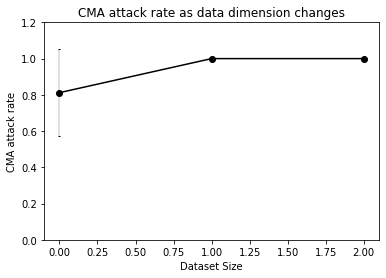

In [73]:
plt.errorbar(xs, ys, es, color='black',capsize=1,elinewidth=0.25, marker = 'o')
plt.ylim(0,1.2)
plt.title('CMA attack rate as data dimension changes')
plt.xlabel('Dataset Size')
plt.ylabel('CMA attack rate')
plt.show()

In [74]:
for i in range(25):
    print(all_info[i][0][10].test_accuracy)

tensor(0.9898, device='cuda:0')
tensor(0.9986, device='cuda:0')
tensor(0.9966, device='cuda:0')
tensor(0.9978, device='cuda:0')
tensor(0.9960, device='cuda:0')
tensor(0.9977, device='cuda:0')
tensor(0.9985, device='cuda:0')
tensor(0.9980, device='cuda:0')
tensor(0.9984, device='cuda:0')
tensor(0.9746, device='cuda:0')
tensor(0.9976, device='cuda:0')
tensor(0.9980, device='cuda:0')
tensor(0.9975, device='cuda:0')
tensor(0.9984, device='cuda:0')
tensor(0.9959, device='cuda:0')
tensor(0.9991, device='cuda:0')
tensor(0.9986, device='cuda:0')
tensor(0.9975, device='cuda:0')
tensor(0.9933, device='cuda:0')
tensor(0.9981, device='cuda:0')
tensor(0.9984, device='cuda:0')
tensor(0.9975, device='cuda:0')
tensor(0.9995, device='cuda:0')
tensor(0.9989, device='cuda:0')
tensor(0.9981, device='cuda:0')


In [76]:
# attack_per_dims_25

In [72]:
# plt.plot(attack_per_dset_dim.values(), marker='o')
# plt.xticks(list(range(len(attack_per_dset_dim.keys()))), labels = attack_per_dset_dim.keys())
# plt.ylim(0,110)
# plt.title('CMA attack rate as dataset size changes')
# plt.xlabel('Dataset Size')
# plt.ylabel('CMA attack rate')
# plt.show()

# Does Pooling solve the problem?

In [251]:
def predict(model, point):
    prepped_point = torch.from_numpy(point).cuda().float().unsqueeze(0)
    prediction = torch.argmax(model(prepped_point)[0]).item()
    return prediction

In [252]:
print('****** This is a sanity check *******')
for i in range(5):
    random_point = sample_uniform(1, N_dim, test_min, test_max)
    pred_out = predict(model_to_attack.cuda(), np.array(random_point[0]))
    print('Randomly sampled a point from the test_min, test_max range....')
    print('Prediction is %s'%pred_out)
print('****** Should be a lot 0s predicted above*****')

****** This is a sanity check *******
Randomly sampled a point from the test_min, test_max range....
Prediction is 0
Randomly sampled a point from the test_min, test_max range....
Prediction is 0
Randomly sampled a point from the test_min, test_max range....
Prediction is 0
Randomly sampled a point from the test_min, test_max range....
Prediction is 0
Randomly sampled a point from the test_min, test_max range....
Prediction is 0
****** Should be a lot 0s predicted above*****


In [305]:
predict(model_to_attack.cuda(), all_info[0][1][10000].advs[1])

1

##### Let's try to fix this by randomly perturbing the adversarial

In [284]:
pert_to_recovery = {}
for repeats in range(5):
    for p in np.arange(0.05,0.3,0.05):
        all_top_preds = []
        for i in range(50):
            adv_sample = all_info[0][1][10000].advs[i]

            all_preds = []
            for i in range(10):
                perturb_min = -p
                perturb_max = p
                perturb_vector = np.array(sample_uniform(1, N_dim, perturb_min, perturb_max)[0])
                perturbed_sample = adv_sample + perturb_vector
                perturbed_prediction = predict(model_to_attack.cuda(), perturbed_sample)
                all_preds.append(perturbed_prediction)
            top_pred = max(set(all_preds), key = all_preds.count)

            all_top_preds.append(top_pred)

        recovered_acc = (1 - np.sum(all_top_preds)/50)*100
        if "%.02f"%p in pert_to_recovery.keys():
            pert_to_recovery["%.02f"%p].append(recovered_acc)
        else:
            pert_to_recovery["%.02f"%p] = [recovered_acc]
#         print('Recovered %s%% samples by random perturbation.'%recovered_acc)

In [325]:
np.linalg.norm(perturb_vector)

1.4335177

In [300]:
mean_perfs = np.mean(np.array(list(pert_to_recovery.values())),axis=1)
std_perfs = np.std(np.array(list(pert_to_recovery.values())),axis=1)

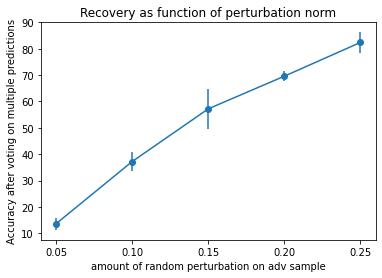

In [308]:
plt.errorbar([0,1,2,3,4], mean_perfs, std_perfs, marker='o')
plt.title('Recovery as function of perturbation norm')
plt.xlabel('amount of random perturbation on adv sample')
plt.ylabel('Accuracy after voting on multiple predictions')
plt.xticks([0,1,2,3,4],labels=list(pert_to_recovery.keys()))
plt.show()

#### Lets see the norm of adversarial perturbation: how much is needed if the direction was known.

In [317]:
adv_point = all_info[0][1][10000].advs[1]
start_point = np.array(all_info[0][1][10000].starts[1])

In [318]:
adv_vec = adv_point - start_point

In [321]:
np.linalg.norm(adv_vec)

2.9962379296577284

In [322]:
np.linalg.norm(adv_point)

5.389204731238513

In [323]:
np.linalg.norm(start_point)

5.800697

# Church Window Plots

In [21]:
def perpendicular_vector(v):
    random_vector = np.random.randn(N_dim)
    orthogonal = random_vector - random_vector.dot(v)*v/np.linalg.norm(v)**2
    orthogonal_normalized = orthogonal/np.linalg.norm(orthogonal) * np.linalg.norm(v)
    return orthogonal_normalized

def plot_church_window(start_point, adv_point):
    adv_vector = adv_point - start_point
    orthogonal_vector = perpendicular_vector(adv_vector)


    ##### Collect Predictions ######
    predictions = np.zeros((40,40))

    row_num = 0
    col_num = 0

    for alpha in np.arange(0, 2.0, 0.05):
        for beta in np.arange(0, 2.0, 0.05):
            curr_point = start_point + beta*adv_vector + alpha*orthogonal_vector
            curr_pred = predict(model, curr_point)
            predictions[row_num][col_num] = curr_pred
            col_num += 1
        row_num += 1
        col_num = 0

    ##### Plot ######
    plt.imshow(predictions, cmap=custom_cmap)
    plt.xlim([0, 40])
    plt.ylim([0, 40])
    plt.title('Church Window Plot')
    plt.xticks(range(0,40,5), labels = np.arange(0,2,0.25))
    plt.yticks(range(0,40,5), labels = np.arange(0,2,0.25))
    plt.xlabel('Adversarial Direction')
    plt.ylabel('Orthogonal Direction')
    plt.show()

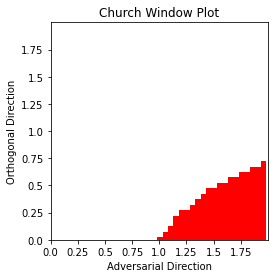

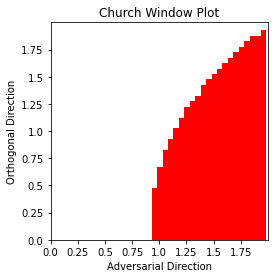

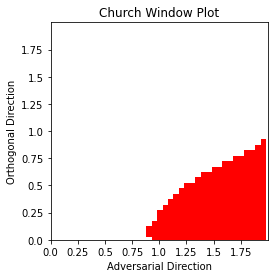

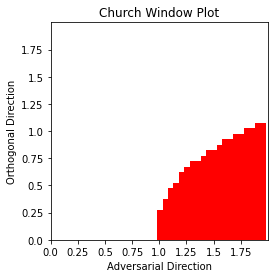

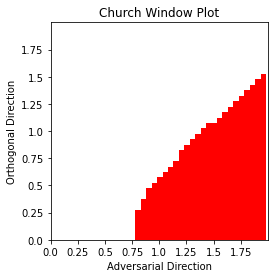

In [23]:
DSIZE = 10000


from matplotlib import colors

custom_cmap = colors.ListedColormap(['white', 'red'])
bounds=[0,1]
norm = colors.BoundaryNorm(bounds, custom_cmap.N)

model = all_info[0][0][DSIZE].cuda()

for i in range(5):
    adv_point = all_info[0][1][DSIZE].in_dist_advs[i]
    start_point = all_info[0][1][DSIZE].starts[i]
    start_point = np.array(start_point)[0]
    plot_church_window(start_point, adv_point)

# Nearest neighbor analysis

In [28]:
starting_points = all_info[0][1][10000].starts
in_dist_advs_points = all_info[0][1][10000].in_dist_advs

In [29]:
training_points = all_info[0][0][10000].dataset[0]

In [30]:
start_neighbor_distances = []
for start_p in starting_points:
    distances = torch.sum((training_points - start_p.cuda())**2, dim = 1)
    neighbors = torch.argsort(distances)[:10].cpu()
    neighbor_distance = torch.sum(distances[neighbors]).item()
    start_neighbor_distances.append(neighbor_distance)

In [31]:
adv_neighbor_distances = []
for adv_p in in_dist_advs_points:
    distances = torch.sum((training_points - torch.from_numpy(adv_p).cuda())**2, dim = 1)
    neighbors = torch.argsort(distances)[:10].cpu()
    neighbor_distance = torch.sum(distances[neighbors]).item()
    adv_neighbor_distances.append(neighbor_distance)

(array([ 2.,  3., 24., 40., 45., 47., 24., 10.,  4.,  1.]),
 array([ 9915.65136719,  9974.9921875 , 10034.33300781, 10093.67382812,
        10153.01464844, 10212.35546875, 10271.69628906, 10331.03710938,
        10390.37792969, 10449.71875   , 10509.05957031]),
 <BarContainer object of 10 artists>)

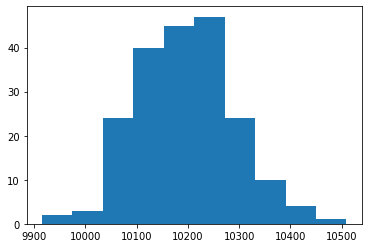

In [32]:
plt.hist(start_neighbor_distances)

(array([ 3.,  7., 27., 39., 52., 34., 23., 10.,  4.,  1.]),
 array([ 9939.33247206,  9988.23968375, 10037.14689545, 10086.05410715,
        10134.96131885, 10183.86853054, 10232.77574224, 10281.68295394,
        10330.59016564, 10379.49737733, 10428.40458903]),
 <BarContainer object of 10 artists>)

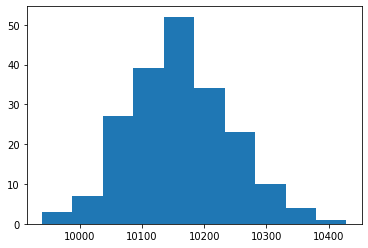

In [33]:
plt.hist(adv_neighbor_distances)

In [34]:
np.mean(adv_neighbor_distances)

10160.343138349179

In [35]:
np.mean(start_neighbor_distances)

10196.771958007812

In [36]:
np.std(adv_neighbor_distances)

81.89637551160129

In [37]:
np.std(start_neighbor_distances)

94.20267086666723

# Adversarial Training analysis

### Collect adv points (25% of training data size)

In [85]:
attack_output_2 = {}

In [101]:
attack_output_2[dsize] = cma_experiment(model_to_attack, 4000)

dset_size_10000


  0%|          | 0/4000 [00:00<?, ?it/s]

In [107]:
# with open('inof.p', 'wb') as F:
#     pickle.dump(attack_output_2, F)

In [131]:
augmented_training_data = torch.vstack([training_points, torch.tensor(attack_output_2[dsize].in_dist_advs).float().cuda()])

### Train with them

In [132]:
training_labels = dset[2]

In [133]:
augmented_training_labels = torch.hstack([training_labels, torch.zeros(4000).long().cuda()])

In [134]:
# augmented_training_labels[-1]

In [135]:
dset_new = [augmented_training_data, dset[1], augmented_training_labels, dset[3]] 

In [136]:
adv_trained_models = {}

In [144]:
adv_attack_output = {}

In [137]:
# dset = make_dataset(dsize)
adv_trained_models[dsize] = train_model(N_dim, dset_new, 'dset_size_%s_adv'%dsize)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:999, Train Acc:tensor(1., device='cuda:0')
Epoch:999, Test Acc:tensor(1., device='cuda:0')


In [143]:
# adv_trained_models[10000].dataset[0].shape

In [145]:
adv_model_to_attack = adv_trained_models[dsize].cpu()
adv_attack_output[dsize] = cma_experiment(adv_model_to_attack, 50)

dset_size_10000_adv


  0%|          | 0/50 [00:00<?, ?it/s]

In [147]:
# len(adv_attack_output[dsize].in_dist_advs)

# Aggregate evaluation

In [163]:
all_distances = {}
in_dists = {}

In [164]:
# all_info[0][1][dsize].in_dist_advs

In [165]:
for dsize in [1000, 100000]:
    all_distances[dsize] = []
    in_dists[dsize] = []
    for i in range(1):
        in_dists[dsize].append(len(all_info[i][1][dsize].in_dist_advs))
        all_distances[dsize].append(np.nanmean(all_info[i][1][dsize].distances))

In [166]:
# all_distances.keys()

In [167]:
for key in all_distances.keys():
    print(np.nanmean(all_distances[key]))

3.2171293443927995
5.13962748088732


In [168]:
for key in in_dists.keys():
    print(np.mean(in_dists[key]))

10.0
10.0


In [169]:
def predict(model, point):
    prepped_point = torch.from_numpy(point).cuda().float().unsqueeze(0)
    prediction = torch.argmax(model(prepped_point)[0]).item()
    return prediction

# Sensitivity Analysis

In [190]:
DSIZE = 1000

In [191]:
mod = all_info[0][0][DSIZE].cuda()

In [192]:
def min_subset(start, adv, mod, start_id = 0):
    for i in range(start_id, start_id + 50):
        index = i%50
        start[:index] = adv[:index]
        start_pred = predict(mod, start)
        adv_pred = predict(mod, adv)
        if start_pred == adv_pred:
            break
    return index        
#     print('Broke at %i'%index)

In [193]:
broken_changes = []
for i in range(10):
    adv_point = all_info[0][1][DSIZE].in_dist_advs[i]
    start_point = all_info[0][1][DSIZE].starts[i]
    start_point = np.array(start_point)[0]
    broken_change = min_subset(start_point, adv_point, mod, random.choice(list(range(50))))
    broken_changes.append(broken_change)

In [194]:
print(np.mean(broken_changes))
print(np.std(broken_changes))

44.1
6.057227088363123


# Opposite change

In [137]:
with open('info_iters.p','rb') as F:
    all_info = pickle.load(F)

In [138]:
def min_subset_reform(start, adv, mod, start_id = 0):
    for i in range(start_id, start_id + 50):
        index = i%50
        adv[:index] = start[:index]
        start_pred = predict(mod, start)
        adv_pred = predict(mod, adv)
        if start_pred == adv_pred:
            break
    return index

In [139]:
broken_changes = []
for i in range(50):
    adv_point = all_info[0][1][DSIZE].in_dist_advs[i]
    start_point = all_info[0][1][DSIZE].starts[i]
    start_point = np.array(start_point)[0]
    broken_change = min_subset_reform(start_point, adv_point, mod, random.choice(list(range(50))))
    broken_changes.append(broken_change)

In [530]:
print(np.mean(broken_changes))
print(np.std(broken_changes))

24.18
13.122027282398097


# Random Perturb

In [532]:
with open('info_iters.p','rb') as F:
    all_info = pickle.load(F)

In [533]:
def min_subset_random(start, adv, mod, start_id = 0):
    for i in range(start_id, start_id + 50):
        index = i%50
        start[index] = np.random.normal(loc=np.mean(start[index]),scale=np.std(start[index]))
        start_pred = predict(mod, start)
        adv_pred = predict(mod, adv)
        if start_pred == adv_pred:
            break
    return index

In [534]:
broken_changes = []
for i in range(50):
    adv_point = all_info[0][1][DSIZE].in_dist_advs[i]
    start_point = all_info[0][1][DSIZE].starts[i]
    start_point = np.array(start_point)[0]
    broken_change = min_subset_random(start_point, adv_point, mod, random.choice(list(range(50))))
    broken_changes.append(broken_change)

In [536]:
print(np.mean(broken_changes))
print(np.std(broken_changes))

28.98
12.657788116412757
